# Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.


- Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
- Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
- Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
- Using dow_bond, plot only the Dow and bond values.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Extracted from DataCamp with df.to_csv(index=False)
csv_content_ten_yr = """metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01\nopen,0.033490769,-0.060448691,0.025425602000000002,-0.004312204,0.060632307999999996,0.02715394,-0.059232757000000004,-0.046270864,0.014399646,-0.027080148999999998,-0.114702581,0.022565922999999998,-0.09447061699999999,-0.024644031,-0.021336327999999998,0.07601835900000001,0.073047187,-0.020621118,0.0,-0.024099442000000002,-0.025734338,0.05042689400000001,-0.267716535,-0.23586541800000002,0.285973672,0.045887752000000004,-0.102598718,0.191049267,0.10672560800000001,0.023965762999999998,-0.006687099,-0.046563815,-0.032068255,0.034346505,-0.050543637999999995\nhigh,-0.007337954,-0.040657083999999996,0.022046233,0.030575916,0.08026823799999999,-0.021632807,-0.059796193,-0.038445808,0.003615483,-0.055520237,-0.039488445,-0.053492175,-0.022704837000000002,-0.064646465,0.049676026,0.064557613,0.044696787,-0.034690102,-0.020124581000000002,-0.045232274,0.052240717,-0.035288391,-0.27169525699999997,-0.01073779,0.06932773099999999,-0.004256713,0.04110490000000001,0.186986734,0.068121341,-0.061783757,0.031864047,-0.090324241,0.012446958999999999,-0.004191115,0.099326599\nlow,-0.016146629,-0.007984032,0.031075341,-0.0021682570000000003,0.059104737000000004,-0.027287649,-0.051676861,-0.043371886,0.002557545,-0.10830241199999999,-0.00130039,-0.145572917,0.074672356,-0.067498582,0.043187348,0.073469388,0.047256926,-0.022562241,-0.001591934,-0.13632739800000002,0.046153846,-0.138235294,-0.30443686,0.059371932999999995,0.21723019899999998,-0.062404870999999994,0.068993506,0.16818527,0.12317192099999999,-0.055266204000000006,0.039509954,-0.035945787,-0.050733495999999996,0.030264005,0.0071875\nclose,-0.05719022,0.021538462,-0.003872633,0.056155508,0.029243354,-0.052056427999999995,-0.049046322,0.009257218000000001,-0.022712383,-0.112402235,0.015861027,-0.098141264,-0.028854081,-0.028862479,0.09527972,0.076350093,-0.016559565,0.0,-0.041719025,0.00367165,0.037366083,-0.25516372800000003,-0.24112276,0.267379679,0.069268636,-0.11706675400000001,0.163500931,0.10915493,0.016738817,-0.006244678,-0.028563268,-0.02763893,0.025703054,-0.056308962000000004,0.200562324\n"""
csv_content_dji = """date,close\n2007-02-01,0.005094385\n2007-03-01,-0.02613902\n2007-04-01,0.04852522\n2007-05-01,0.052007442\n2007-06-01,-0.016070328000000002\n2007-07-01,0.038005504\n2007-08-01,-0.063894742\n2007-09-01,0.066521287\n2007-10-01,0.002475632\n2007-11-01,-0.024041665\n2007-12-01,-0.01062883\n2008-01-01,-0.059491712999999995\n2008-02-01,-0.035595773\n2008-03-01,0.013213023\n2008-04-01,0.020871591999999998\n2008-05-01,-0.00143428\n2008-06-01,-0.042702328\n2008-07-01,-0.057398135\n2008-08-01,0.025433807000000003\n2008-09-01,-0.069100093\n2008-10-01,-0.15418084599999998\n2008-11-01,-0.080309949\n2008-12-01,0.058127134000000004\n2009-01-01,-0.037496447999999995\n2009-02-01,-0.16479474300000002\n2009-03-01,0.042397187999999995\n2009-04-01,0.064512765\n2009-05-01,0.05677603\n2009-06-01,0.038969204\n2009-07-01,-0.047834178\n2009-08-01,0.11097163\n2009-09-01,0.05759352\n2009-10-01,-0.007827874\n2009-11-01,0.07739017599999999\n2009-12-01,-0.003478498\n2010-01-01,-0.022410836\n2010-02-01,0.012850318999999999\n2010-03-01,0.050855723\n2010-04-01,0.01551093\n2010-05-01,-0.080054868\n2010-06-01,-0.035769399\n2010-07-01,0.078133736\n2010-08-01,-0.034476195\n2010-09-01,0.067414235\n2010-10-01,0.023774684\n2010-11-01,-0.002383415\n2010-12-01,0.039776433\n2011-01-01,0.031101532\n2011-02-01,0.014329031\n2011-03-01,-0.0021388789999999998\n2011-04-01,0.032418077999999996\n2011-05-01,0.001198984\n2011-06-01,-0.002194236\n2011-07-01,0.002626051\n2011-08-01,-0.06695646\n2011-09-01,-0.03640589\n2011-10-01,0.025681987000000003\n2011-11-01,0.001359161\n2011-12-01,0.045912125\n2012-01-01,0.052597849\n2012-02-01,0.017741846000000002\n2012-03-01,0.025919756000000002\n2012-04-01,-0.009181033\n2012-05-01,-0.053259198\n2012-06-01,0.034768257000000004\n2012-07-01,-0.00014041799999999998\n2012-08-01,0.0350163\n2012-09-01,0.024247324\n2012-10-01,-0.018273602\n2012-11-01,-0.026968932\n2012-12-01,0.011859747\n2013-01-01,0.028023244\n2013-02-01,0.036520977999999996\n2013-03-01,0.023491879\n2013-04-01,0.037377411\n2013-05-01,0.016851552\n2013-06-01,-0.000224894\n2013-07-01,0.025628287000000003\n2013-08-01,-0.042491667999999996\n2013-09-01,0.028118227000000003\n2013-10-01,0.007576228000000001\n2013-11-01,0.032678999\n2013-12-01,0.018379701000000002\n2014-01-01,0.015901757\n2014-02-01,-0.014940513\n2014-03-01,0.014771536000000002\n2014-04-01,0.007107820999999999\n2014-05-01,0.010994522\n2014-06-01,0.006544182\n2014-07-01,-0.993017009\n2014-08-01,144.5183012\n2014-09-01,-0.003245918\n2014-10-01,0.020395567\n2014-11-01,0.025168869\n2014-12-01,-0.000286042\n2015-01-01,-0.03692956\n2015-02-01,0.056382432\n2015-03-01,-0.019666107\n2015-04-01,0.014750208\n2015-05-01,-0.0015301639999999999\n2015-06-01,-0.021720378999999998\n2015-07-01,0.006379318\n2015-08-01,-0.067894606\n2015-09-01,-0.025750218\n2015-10-01,0.096948254\n2015-11-01,0.003193047\n2015-12-01,-0.016642328\n2016-01-01,-0.055018607000000004\n2016-02-01,0.003048603\n2016-03-01,0.070753465\n2016-04-01,0.0050042129999999995\n2016-05-01,0.000765158\n2016-06-01,0.008028289000000001\n2016-07-01,0.02800888\n2016-08-01,-0.001698052\n2016-09-01,-0.005037860999999999\n2016-10-01,-0.009055988000000001\n2016-11-01,0.054083208\n2016-12-01,0.033414211\n2017-01-01,0.005135964\n2017-02-01,0.047729302\n2017-03-01,-0.007159263000000001\n2017-04-01,0.013420031\n2017-05-01,0.0032568090000000003\n2017-06-01,0.01622663\n2017-07-01,0.025363472999999997\n2017-08-01,0.002603798\n2017-09-01,0.020821848\n2017-10-01,0.04338742599999999\n2017-11-01,0.038293773999999996\n2017-12-01,0.01840769\n2018-01-01,0.057857909000000006\n2018-02-01,-0.042838503\n2018-03-01,-0.034663499\n2018-04-01,6.208199999999999e-05\n2018-05-01,0.010458144\n2018-06-01,-0.005914219\n2018-07-01,0.047125374000000005\n2018-08-01,0.021624917\n2018-09-01,0.019006501000000002\n2018-10-01,-0.05074022\n2018-11-01,0.016830012\n2018-12-01,-0.08657517099999999\n2019-01-01,0.071683602\n2019-02-01,0.036652472\n2019-03-01,0.000490015\n2019-04-01,0.025616447999999997\n2019-05-01,-0.066856205\n2019-06-01,0.07810595299999999\n2019-07-01,\n2019-08-01,\n2019-09-01,\n2019-10-01,0.006778502\n2019-11-01,\n2019-12-01,\n2020-01-01,\n2020-02-01,-0.010447310999999999\n2020-03-01,-0.216145511\n2020-04-01,0.034803753\n"""
ten_yr = pd.read_csv(StringIO(csv_content_ten_yr))
dji = pd.read_csv(StringIO(csv_content_dji))

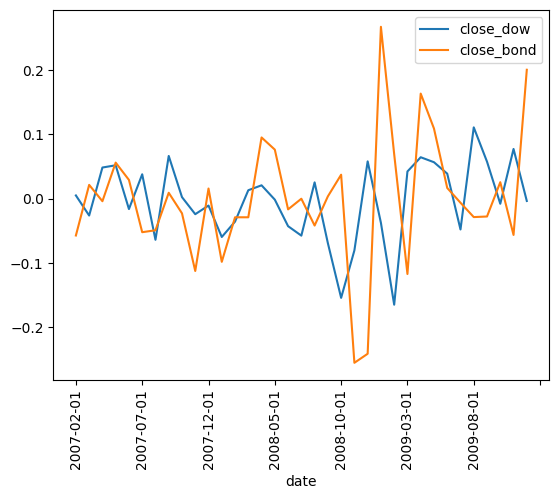

In [37]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])

# Plot only the close_dow and close_bond columns
dow_bond.plot(x='date', y=['close_dow', 'close_bond'], rot=90)
plt.show()

Super job! You used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.